In [6]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Machine learning /FinalProject/
df = pd.read_csv("CC GENERAL.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Machine learning /FinalProject


In [7]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [28]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,False
BALANCE,False
BALANCE_FREQUENCY,False
PURCHASES,False
ONEOFF_PURCHASES,False
INSTALLMENTS_PURCHASES,False
CASH_ADVANCE,False
PURCHASES_FREQUENCY,False
ONEOFF_PURCHASES_FREQUENCY,False
PURCHASES_INSTALLMENTS_FREQUENCY,False


In [29]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


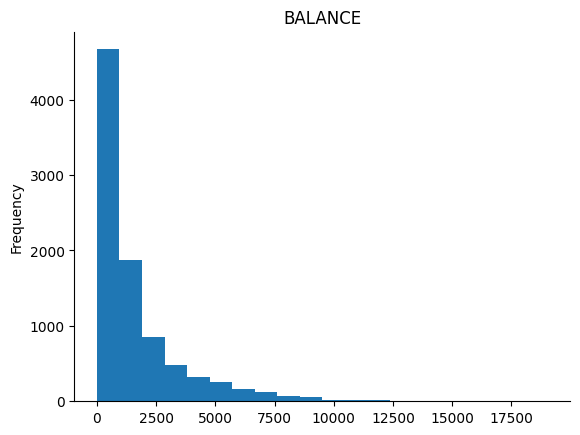

In [17]:
# @title BALANCE (here we can se that most of people have not money))

from matplotlib import pyplot as plt
df['BALANCE'].plot(kind='hist', bins=20, title='BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

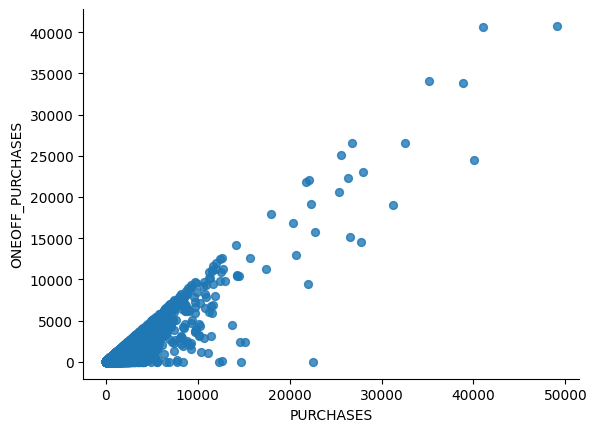

In [19]:
# @title PURCHASES vs ONEOFF_PURCHASES

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

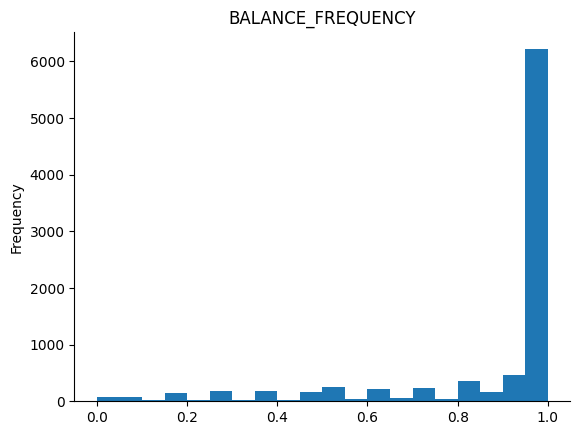

In [23]:
# @title BALANCE_FREQUENCY(here we can see that most of peope balances were updated  frequently)

from matplotlib import pyplot as plt
df['BALANCE_FREQUENCY'].plot(kind='hist', bins=20, title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right',]].set_visible(False)

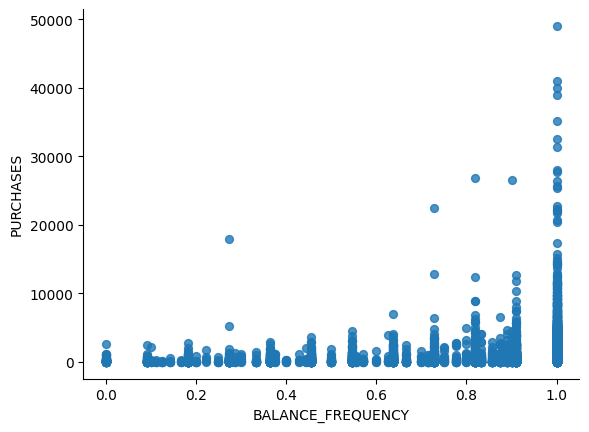

In [26]:
# @title BALANCE_FREQUENCY vs PURCHASES(here we can se some relationship.How big is Frequency then big amount of purchases is more possible)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BALANCE_FREQUENCY', y='PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
import numpy as np

###now find indexes of outliers
def delete_outliers(df,percentile = 0.2):
  """df:Pandas DataFrame
     percentile:float value from 0 to 1 which shows min percentage of variables in observation which can be considered as outlier
  return:Pandas DataFrame without outliers
  """
  new_df = df.copy()
  def indicies_of_outliers(x):
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(x):
        return np.where([False]) # Return an empty array of indices

    q1,q2, q3 = np.percentile(x.dropna(), [25,50, 75]) # Drop NaN values before calculating percentiles
    iqr = q3-q1
    lower_bound_condition = x > q2 - 1.5*iqr
    upper_bound_condition = x < q2 + 1.5*iqr

    # Handle empty sequences for lower bound
    if x[lower_bound_condition].empty:
        lower_bound = x.min() # Use the minimum of the entire column if no values are above the calculated lower bound
    else:
        lower_bound = min(x[lower_bound_condition])

    # Handle empty sequences for upper bound
    if x[upper_bound_condition].empty:
        upper_bound = x.max() # Use the maximum of the entire column if no values are below the calculated upper bound
    else:
        upper_bound = max(x[upper_bound_condition])

    return np.where((x > upper_bound) | (x < lower_bound))

  new_df = df.copy()
  indices_to_drop = np.array([])
  for var in new_df.columns:
    indices = indicies_of_outliers(new_df[var])
    indices_to_drop = np.append(indices_to_drop, indices)
    #print(indices)
    # indices_to_drop = np.union1d(indices_to_drop, indices)

  # Drop rows by index
  #new_df = new_df.drop(list(indices_to_drop))
  unique_values, counts = np.unique(indices_to_drop, return_counts=True)

    # Find values that meet the threshold
  observations_to_drop = unique_values[counts > int(len(new_df.columns)*percentile)]
  new_df = new_df.drop(observations_to_drop)
  return new_df

##ID is not neccesary for clustering
cleaned_df = df.drop(columns=['CUST_ID'])
cleaned_df = delete_outliers(cleaned_df)
cleaned_df
# cleaned_df.info()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
